In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

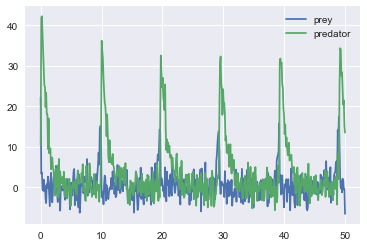

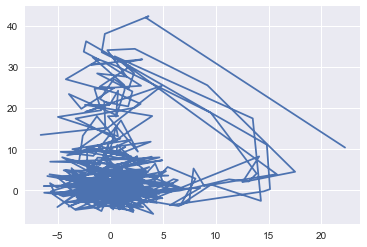

In [3]:
#ロトカ・ヴォルテラ
# dx/dt = ax-xy
# dy/dt = bxy-y

#a,b:定数
#v:変数格納のリスト(x,y)
#ndiv: 分割数
#nlevel: ノイズレベル

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv

def func(v, t, a, b):
    return [a*v[0]-v[0]*v[1], b*v[0]*v[1]-v[1]]

a = 4
b = 1.5
ndiv = 500
nlevel = 2.5
v0 = [20, 10]  #初期条件(x0,y0)
t = np.linspace(0, 50., ndiv)  #時間レンジ、間隔

sol_v = odeint(func, v0, t, args=(a, b)) + np.random.normal(0.0,nlevel,(ndiv,2))

plt.plot(t, sol_v[:,0], label="prey")
plt.plot(t, sol_v[:,1], label="predator")

plt.legend()
plt.show()

csvlist = []
csvlist = np.c_[t,sol_v]

# ファイルオープン
f = open('output.csv', 'w')
writer = csv.writer(f, lineterminator='\n')

# 出力
writer.writerows(csvlist)

# ファイルクローズ
f.close()

plt.plot(csvlist[:,1], csvlist[:,2], label="foo")
plt.show()

In [4]:
#ランダムな初期値(a,b,x0,y0)で微分方程式を解いた解のデータとの距離を計算
#numpy.loadtxtを利用してcsvファイル読み込み

#Lotka-Volterraモデル
# dx/dt = ax-xy
# dy/dt = bxy-y

#a, b: 定数 (ランダム値)
#v0: 初期値(x0, y0) (ランダム値)
#sol_v: ランダムな初期値から求めた解
#ans_v: 読み込んだデータ
#dist: データとの距離(差分の平方和)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv

def func(v, t, a, b):
    return [a*v[0]-v[0]*v[1], b*v[0]*v[1]-v[1]]

def getpara(a,b,v0):
    #ランダム値を4個生成(生成されたランダム値の範囲は0〜1)
    #ここでは 0 <= a,b,x0,yo >= 100  とする
    np.random.seed()
    iniv = np.random.rand(4)
    a = iniv[0] * 100
    b = iniv[1] * 100
    x0 = iniv[2] * 100
    y0 = iniv[3] * 100
    v0 = [x0, y0]
    return a,b,v0

ndiv = 500 #分割数
t = np.linspace(0, 50., ndiv) #時間レンジ、間隔

#CSVファイルの読み込み
data_reader = np.loadtxt('output.csv', delimiter=',')
ans_v = data_reader[:,1:3]

counter = 0
ntry = 0
tolerance = 10000.0
param = []
v0 = []
while counter < 10:
    ntry += 1
    a,b,v0 = getpara(a,b,v0)
#    print a,b,v0
    sol_v = odeint(func, v0, t, args=(a, b))
#    plt.plot(t, sol_v[:,0], label="prey")
#    plt.plot(t, sol_v[:,1], label="predator")

#   plt.legend()
#   plt.show()
    
#ランダムな初期値から求めた解とデータとの平均距離distを計算  
    #答えと計算結果の行列の差
    diff_v = sol_v - ans_v
    #行列要素の二乗を計算してから、その平均を計算 
    dist = np.mean(np.square(diff_v))
    if dist < tolerance: 
        # 行列paramに追加
        param.append([a,b,v0[0],v0[1],dist])
        counter +=1
    
print(ntry, counter)
with open('param.csv','w') as f:
    writer = csv.writer(f)
    writer.writerows(param)

print(param)

/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: overflow encountered in double_scalars
/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: overflow encountered in square
/Users/hachino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/hachino/anaconda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


57 10
[[89.177239370450565, 18.550231113441484, 16.376186519182312, 10.40891405011245, 5831.8850551271034], [3.4839910376343819, 9.8212393583952728, 13.257467913798449, 31.467660660347473, 130.30589390164781], [22.534705666530908, 19.232466605449041, 22.084429097255086, 35.964507294116608, 1334.131818429863], [81.835886819673291, 25.056492514838137, 30.285268214373172, 38.430973363136786, 7975.4977720448633], [98.619031878668423, 20.943364754502248, 2.3971719425068483, 39.649321212856314, 5233.3585085129434], [0.27493306816965823, 65.872475680385804, 4.6532999280390897, 36.313743200571913, 442.32589703839244], [7.0943008963823884, 35.359905268147905, 4.8489146411366368, 81.278983392027897, 288.48342265214183], [91.654464009001515, 63.098587034995155, 1.8458555891702755, 54.671003410793176, 4642.2632650126016], [97.899047671411637, 15.139147123637198, 13.275888520385426, 49.195096180205056, 5689.6044785574268], [62.660427066410797, 46.666137458934529, 15.549194839597424, 74.686831842119